In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('dataset_olympics.csv')
df.fillna(0, inplace=True)
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,0.0,0.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,35656,Stuart Fitzsimmons,M,19.0,0.0,0.0,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Giant Slalom,0
69996,35656,Stuart Fitzsimmons,M,19.0,0.0,0.0,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Slalom,0
69997,35657,"David Thomas ""Dave"" Fitzsimons",M,26.0,170.0,65.0,Australia,AUS,1976 Summer,1976,Summer,Montreal,Athletics,"Athletics Men's 10,000 metres",0
69998,35657,"David Thomas ""Dave"" Fitzsimons",M,30.0,170.0,65.0,Australia,AUS,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 5,000 metres",0


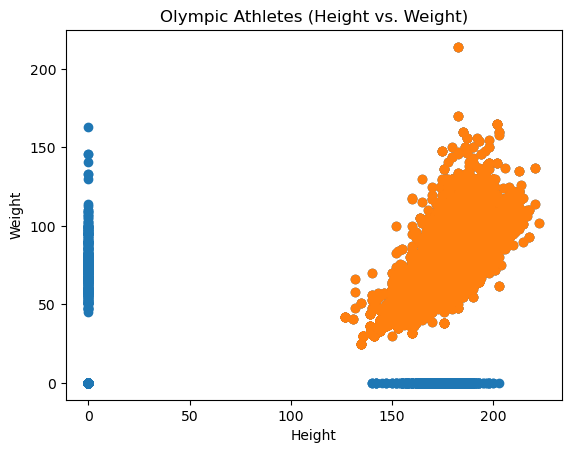

In [3]:
plt.scatter(df["Height"], df["Weight"])
data = pd.read_csv('dataset_olympics.csv')
df = pd.DataFrame(data)
df_filtered = df[(df['Height'] != 0) & (df['Weight'] != 0)]
plt.scatter(df["Height"], df["Weight"])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Olympic Athletes (Height vs. Weight)')
plt.show()


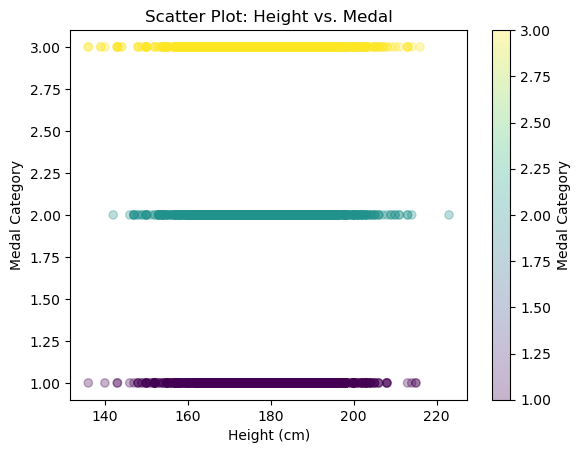

In [39]:
df_filtered = df[(df['Height'] != 0) & df['Medal'].isin(['Gold', 'Silver', 'Bronze'])].copy()

medal_mapping = {'Gold': 3, 'Silver': 2, 'Bronze': 1}
df_filtered['Medal_Category'] = df_filtered['Medal'].map(medal_mapping)

plt.scatter(df_filtered['Height'], df_filtered['Medal_Category'], alpha=0.3, c=df_filtered['Medal_Category'], cmap='viridis')
plt.xlabel('Height (cm)')
plt.ylabel('Medal Category')
plt.title('Scatter Plot: Height vs. Medal')
plt.colorbar(label='Medal Category')
plt.show()


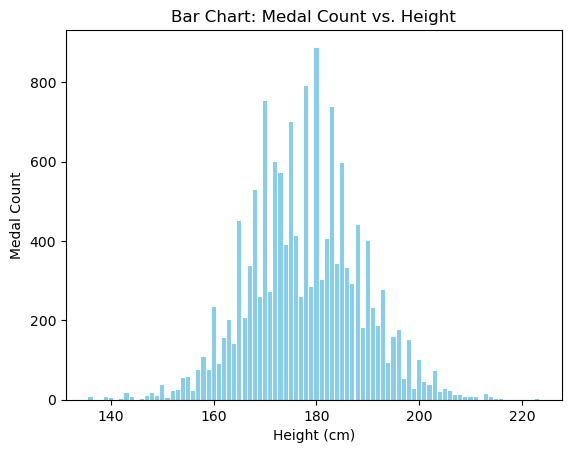

In [40]:
medal_mapping = {'Gold': 3, 'Silver': 2, 'Bronze': 1}
df_filtered['Medal_Category'] = df_filtered['Medal'].map(medal_mapping)

height_medal_counts = df_filtered.groupby('Height')['Medal_Category'].sum()

plt.bar(height_medal_counts.index, height_medal_counts.values, color='skyblue')
plt.xlabel('Height (cm)')
plt.ylabel('Medal Count')
plt.title('Bar Chart: Medal Count vs. Height')
plt.show()


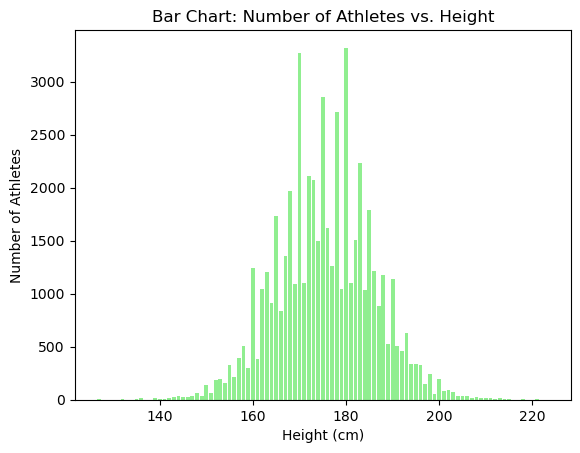

In [9]:
df_filtered = df[df['Height'] != 0]

weight_counts = df_filtered['Height'].value_counts()

plt.bar(weight_counts.index, weight_counts.values, color='lightgreen')
plt.xlabel('Height (cm)')
plt.ylabel('Number of Athletes')
plt.title('Bar Chart: Number of Athletes vs. Height')
plt.show()

C:\Users\natha\AppData\Local\Temp\ipykernel_7968\269415344.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Medal_Category'] = df_filtered['Medal'].map(medal_mapping)


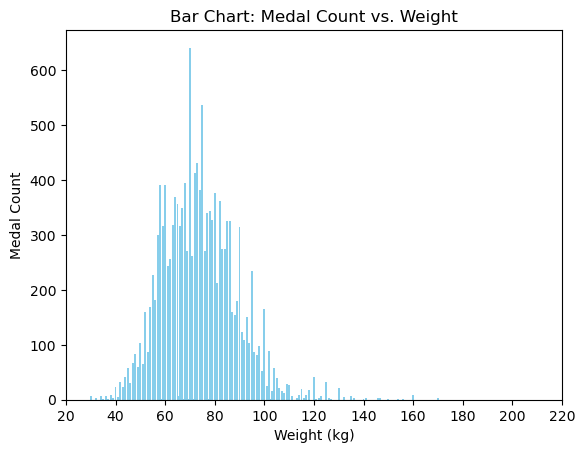

In [72]:
df_filtered = df[(df['Weight'] != 0) & df['Medal'].isin(['Gold', 'Silver', 'Bronze'])]

df_filtered['Medal_Category'] = df_filtered['Medal'].map(medal_mapping)

weight_medal_counts = df_filtered.groupby('Weight')['Medal_Category'].sum()

plt.bar(weight_medal_counts.index, weight_medal_counts.values, color='skyblue')
plt.xlabel('Weight (kg)')
plt.ylabel('Medal Count')
plt.title('Bar Chart: Medal Count vs. Weight')
plt.xticks(range(20, 221, 20))
plt.show()


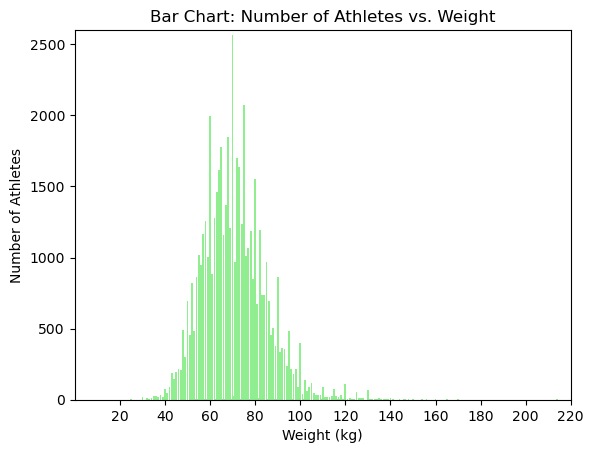

In [71]:
df_filtered = df[df['Weight'] != 0]

weight_counts = df_filtered['Weight'].value_counts()

plt.bar(weight_counts.index, weight_counts.values, color='lightgreen')
plt.xlabel('Weight (kg)')
plt.ylabel('Number of Athletes')
plt.title('Bar Chart: Number of Athletes vs. Weight')
plt.xticks(range(20, 221, 20))
plt.ylim(0, 2600)  
plt.xlim(0, 220)
plt.show()



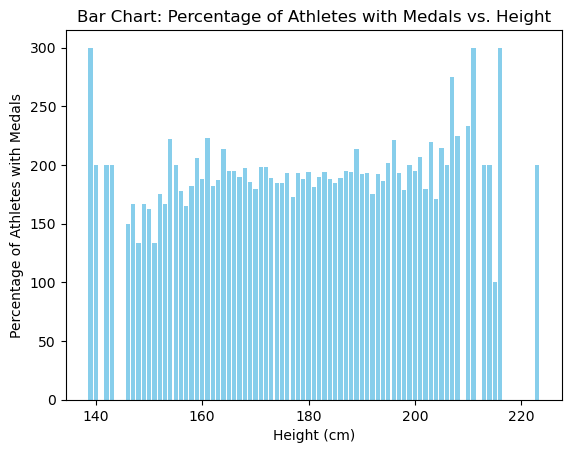

In [43]:
df_filtered = df[(df['Height'] != 0) & df['Medal'].isin(['Gold', 'Silver', 'Bronze'])].copy()

df_filtered['Medal_Category'] = df_filtered['Medal'].map(medal_mapping)

df_filtered.drop_duplicates(subset=['ID', 'Height'], keep=False, inplace=True)

height_medal_counts = df_filtered.groupby('Height')['Medal_Category'].agg(['count', 'sum'])

height_medal_counts['Percentage_Athletes_with_Medals'] = (height_medal_counts['sum'] / height_medal_counts['count']) * 100

plt.bar(height_medal_counts.index, height_medal_counts['Percentage_Athletes_with_Medals'], color='skyblue')
plt.xlabel('Height (cm)')
plt.ylabel('Percentage of Athletes with Medals')
plt.title('Bar Chart: Percentage of Athletes with Medals vs. Height')
plt.show()

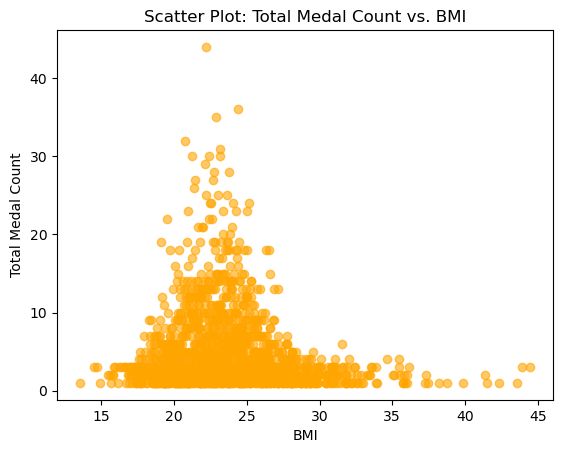

In [44]:
df_filtered = df_filtered[df_filtered['Height'].notna() & df_filtered['Weight'].notna()]

df_filtered['BMI'] = df_filtered['Weight'] / (df_filtered['Height'] / 100) ** 2

df_filtered['Medal_Category'] = df_filtered['Medal'].map(medal_mapping).fillna(0)

bmi_medal_counts = df_filtered.groupby('BMI')['Medal_Category'].sum()

plt.scatter(bmi_medal_counts.index, bmi_medal_counts.values, color='orange', alpha=0.6)
plt.xlabel('BMI')
plt.ylabel('Total Medal Count')
plt.title('Scatter Plot: Total Medal Count vs. BMI')
plt.show()

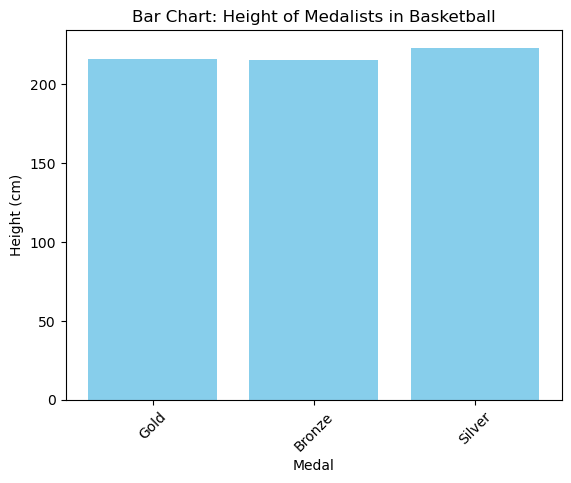

In [45]:
df_basketball_medalists = df[(df['Sport'] == 'Basketball') & df['Medal'].notna()]

plt.bar(df_basketball_medalists['Medal'], df_basketball_medalists['Height'], color='skyblue')
plt.xlabel('Medal')
plt.ylabel('Height (cm)')
plt.title('Bar Chart: Height of Medalists in Basketball')
plt.xticks(rotation=45)
plt.show()


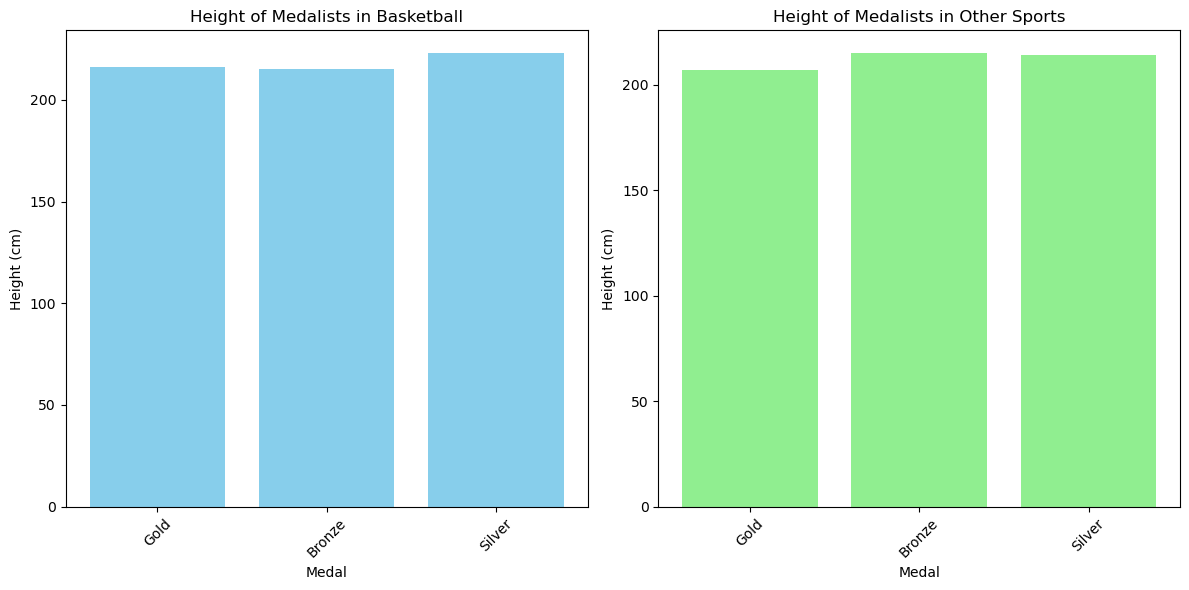

In [46]:
df_medalists = df[df['Medal'].notna()]

is_basketball_medalist = df_medalists['Sport'] == 'Basketball'

df_basketball_medalists = df_medalists[is_basketball_medalist]
df_non_basketball_medalists = df_medalists[~is_basketball_medalist]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart for Height of Basketball Medalists
ax1.bar(df_basketball_medalists['Medal'], df_basketball_medalists['Height'], color='skyblue')
ax1.set_xlabel('Medal')
ax1.set_ylabel('Height (cm)')
ax1.set_title('Height of Medalists in Basketball')
ax1.tick_params(axis='x', rotation=45)

# Bar chart for Height of Non-Basketball Medalists
ax2.bar(df_non_basketball_medalists['Medal'], df_non_basketball_medalists['Height'], color='lightgreen')
ax2.set_xlabel('Medal')
ax2.set_ylabel('Height (cm)')
ax2.set_title('Height of Medalists in Other Sports')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


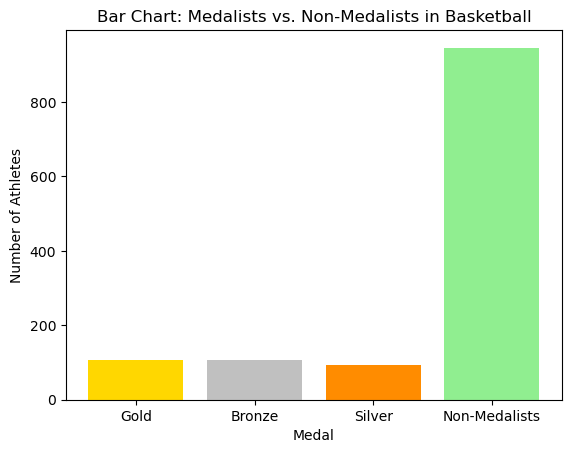

In [47]:
df_basketball = df[df['Sport'] == 'Basketball']

df_medalists = df_basketball[df_basketball['Medal'].notna()]
df_non_medalists = df_basketball[df_basketball['Medal'].isna()]

medal_counts = df_medalists['Medal'].value_counts()
non_medal_count = len(df_non_medalists)

medal_counts['Non-Medalists'] = non_medal_count

plt.bar(medal_counts.index, medal_counts.values, color=['gold', 'silver', 'darkorange', 'lightgreen'])
plt.xlabel('Medal')
plt.ylabel('Number of Athletes')
plt.title('Bar Chart: Medalists vs. Non-Medalists in Basketball')
plt.show()


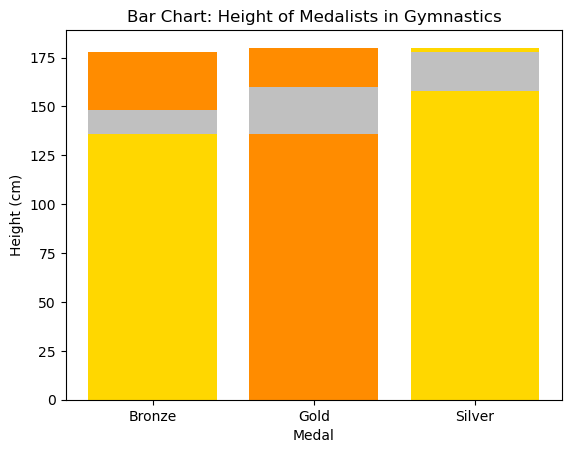

In [48]:
df_gymnastics_medalists = df[(df['Sport'] == 'Gymnastics') & df['Medal'].notna()]

# Create a bar chart to compare Height of Medalists in Gymnastics
plt.bar(df_gymnastics_medalists['Medal'], df_gymnastics_medalists['Height'], color=['gold', 'silver', 'darkorange'])
plt.xlabel('Medal')
plt.ylabel('Height (cm)')
plt.title('Bar Chart: Height of Medalists in Gymnastics')
plt.show()


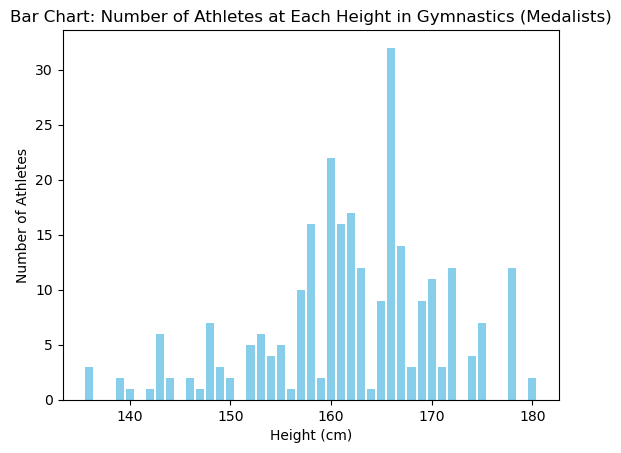

In [28]:
df_gymnastics_medalists = df[(df['Sport'] == 'Gymnastics') & df['Medal'].notna()]

height_counts = df_gymnastics_medalists['Height'].value_counts()

plt.bar(height_counts.index, height_counts.values, color='skyblue')
plt.xlabel('Height (cm)')
plt.ylabel('Number of Athletes')
plt.title('Bar Chart: Number of Athletes at Each Height in Gymnastics (Medalists)')
plt.show()


In [33]:
df_filtered = df[df['Height'].notna()]

tallest_index = df_filtered['Height'].idxmax()

# Get the name, height, and event of the tallest athlete
tallest_name = df_filtered.loc[tallest_index, 'Name']
tallest_height = df_filtered.loc[tallest_index, 'Height']
tallest_event = df_filtered.loc[tallest_index, 'Event']
tallest_year = df_filtered.loc[tallest_index, 'Year']

print(f"The tallest athlete is {tallest_name}, who is {tallest_height} cm tall and participated in the event: {tallest_event}.")
print(f"He participated in the year: {tallest_year}.")

The tallest athlete is Tommy Loren Burleson, who is 223.0 cm tall and participated in the event: Basketball Men's Basketball.
He participated in the year: 1972.


In [36]:
df_filtered = df[df['Height'].notna()]

shortest_index = df_filtered['Height'].idxmin()

# Get the name, height, event, and year of the shortest athlete
shortest_name = df_filtered.loc[shortest_index, 'Name']
shortest_height = df_filtered.loc[shortest_index, 'Height']
shortest_event = df_filtered.loc[shortest_index, 'Event']
shortest_year = df_filtered.loc[shortest_index, 'Year']

print(f"The shortest athlete is {shortest_name}, who is {shortest_height} cm tall and participated in the event: {shortest_event}.")
print(f"She participated in the year: {shortest_year}.")

The shortest athlete is Rosario Briones, who is 127.0 cm tall and participated in the event: Gymnastics Women's Individual All-Around.
She participated in the year: 1968.


In [37]:

df_filtered = df[df['Weight'].notna()]

heaviest_index = df_filtered['Weight'].idxmax()

# Get the name, weight, event, and year of the heaviest athlete
heaviest_name = df_filtered.loc[heaviest_index, 'Name']
heaviest_weight = df_filtered.loc[heaviest_index, 'Weight']
heaviest_event = df_filtered.loc[heaviest_index, 'Event']
heaviest_year = df_filtered.loc[heaviest_index, 'Year']

print(f"The heaviest athlete is {heaviest_name}, who weighs {heaviest_weight} kg and participated in the event: {heaviest_event}.")
print(f"He participated in the year: {heaviest_year}.")


The heaviest athlete is Ricardo Blas, Jr., who weighs 214.0 kg and participated in the event: Judo Men's Heavyweight.
He participated in the year: 2008.


In [50]:

df_filtered = df[df['Weight'].notna()]

lightest_index = df_filtered['Weight'].idxmin()

# Get the name, weight, event, and year of the lightest athlete
lightest_name = df_filtered.loc[lightest_index, 'Name']
lightest_weight = df_filtered.loc[lightest_index, 'Weight']
lightest_event = df_filtered.loc[lightest_index, 'Event']
lightest_year = df_filtered.loc[lightest_index, 'Year']

print(f"The lightest athlete is {lightest_name}, who weighs {lightest_weight} kg and participated in the event: {lightest_event}.")
print(f"She participated in the year: {lightest_year}.")

The lightest athlete is Choi Myong-Hui, who weighs 25.0 kg and participated in the event: Gymnastics Women's Individual All-Around.
She participated in the year: 1980.


(1900.0, 2020.0)

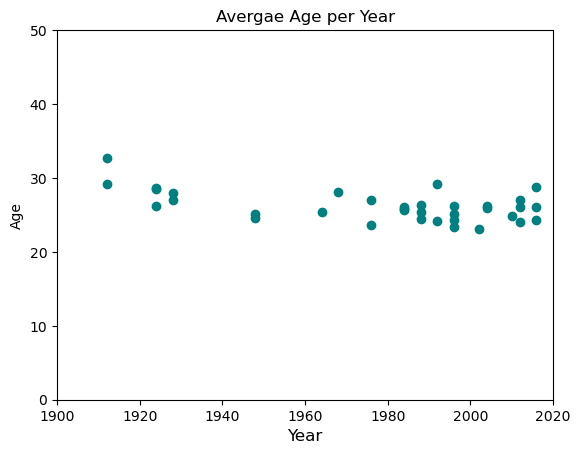

In [73]:
female_data = pd.read_csv('dataset_olympics.csv')

AverageFemaleAge = (female_data["Age"]).mean()
Average_Female_Sex = female_data.groupby('Year')['Age'].mean()

femaleyear = (female_data['Year'])
Female_Data_Set = pd.DataFrame({
    "Age":Average_Female_Sex,
    "Year":femaleyear
})
fig1,ax1 = plt.subplots()
marker_size = 12
plt.scatter(Female_Data_Set['Year'], Female_Data_Set['Age'], color = "teal")
plt.title('Avergae Age per Year')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Age')
plt.ylim(0,50)
plt.xlim(1900,2020)


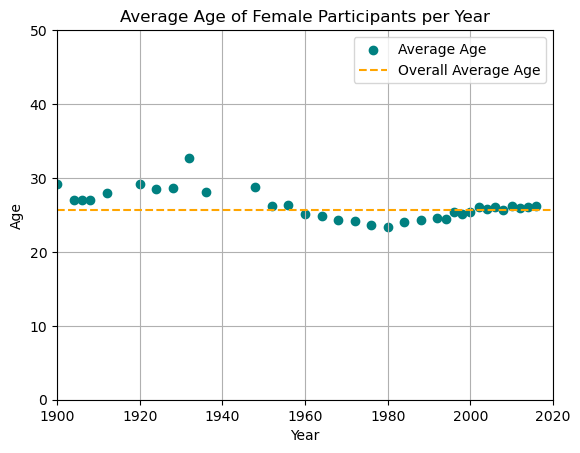

In [51]:
female_data = pd.read_csv('dataset_olympics.csv')

# Calculate the overall average female age
AverageFemaleAge = female_data["Age"].mean()

# Calculate average female age per year
Average_Female_Sex = female_data.groupby('Year')['Age'].mean().reset_index()

fig1, ax1 = plt.subplots()
marker_size = 12

plt.scatter(Average_Female_Sex['Year'], Average_Female_Sex['Age'], color="teal", label="Average Age")
plt.axhline(y=AverageFemaleAge, color='orange', linestyle='--', label='Overall Average Age')

plt.title('Average Age of Female Participants per Year')
plt.xlabel('Year')
plt.ylabel('Age')
plt.ylim(0, 50)
plt.xlim(1900, 2020)
plt.legend()
plt.grid(True)

plt.show()


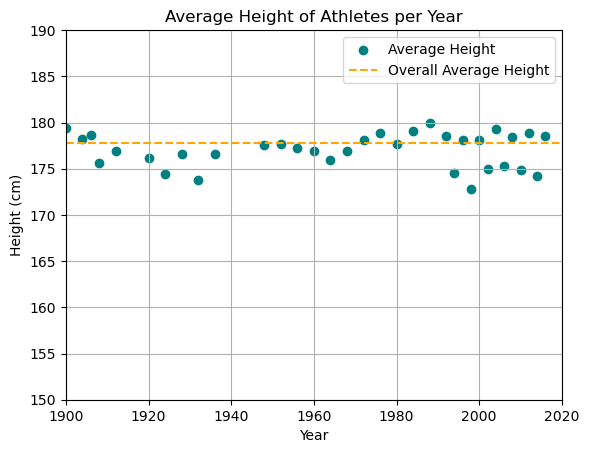

In [74]:
average_height_all = df_filtered['Height'].mean()

average_height_per_year = df_filtered.groupby('Year')['Height'].mean().reset_index()

fig, ax = plt.subplots()
marker_size = 12

plt.scatter(average_height_per_year['Year'], average_height_per_year['Height'], color="teal", label="Average Height")
plt.axhline(y=average_height_all, color='orange', linestyle='--', label='Overall Average Height')

plt.title('Average Height of Athletes per Year')
plt.xlabel('Year')
plt.ylabel('Height (cm)')
plt.ylim(150, 190)  
plt.xlim(1900, 2020)
plt.legend()
plt.grid(True)

plt.show()


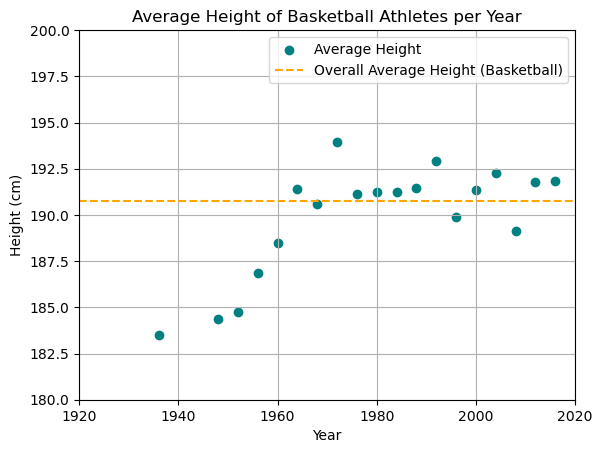

In [58]:
df_filtered = df[(df['Height'].notna()) & (df['Sport'] == 'Basketball')]

average_height_basketball_all = df_filtered['Height'].mean()

average_height_basketball_per_year = df_filtered.groupby('Year')['Height'].mean().reset_index()

fig, ax = plt.subplots()
marker_size = 12

plt.scatter(average_height_basketball_per_year['Year'], average_height_basketball_per_year['Height'], color="teal", label="Average Height")
plt.axhline(y=average_height_basketball_all, color='orange', linestyle='--', label='Overall Average Height (Basketball)')

plt.title('Average Height of Basketball Athletes per Year')
plt.xlabel('Year')
plt.ylabel('Height (cm)')
plt.ylim(180, 200)  
plt.xlim(1920, 2020)
plt.legend()
plt.grid(True)

plt.show()


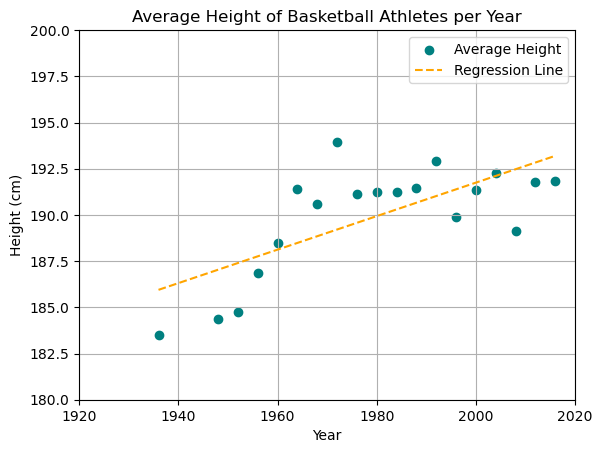

In [61]:
import numpy as np
from sklearn.linear_model import LinearRegression

df_filtered = df[(df['Height'].notna()) & (df['Sport'] == 'Basketball')]

average_height_basketball_per_year = df_filtered.groupby('Year')['Height'].mean().reset_index()

# Perform linear regression
X = average_height_basketball_per_year['Year'].values.reshape(-1, 1)
y = average_height_basketball_per_year['Height'].values.reshape(-1, 1)

regression = LinearRegression()
regression.fit(X, y)

y_pred = regression.predict(X)

fig, ax = plt.subplots()
marker_size = 12

plt.scatter(average_height_basketball_per_year['Year'], average_height_basketball_per_year['Height'], color="teal", label="Average Height")
plt.plot(X, y_pred, color='orange', linestyle='--', label='Regression Line')

plt.title('Average Height of Basketball Athletes per Year')
plt.xlabel('Year')
plt.ylabel('Height (cm)')
plt.ylim(180, 200) 
plt.xlim(1920, 2020)
plt.legend()
plt.grid(True)

plt.show()


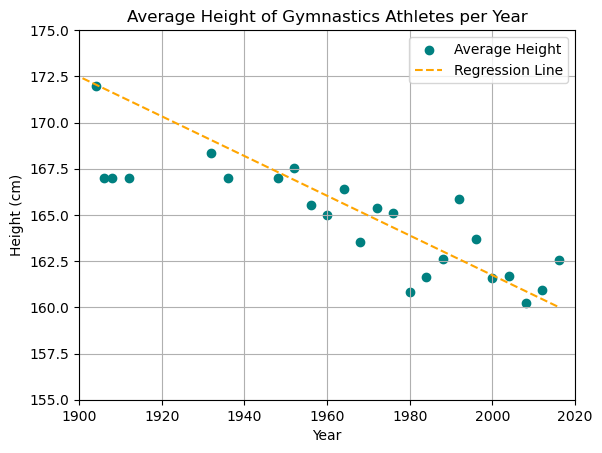

In [75]:
df_filtered = df[(df['Height'].notna()) & (df['Sport'] == 'Gymnastics')]

average_height_gymnastics_per_year = df_filtered.groupby('Year')['Height'].mean().reset_index()

# Perform linear regression
X = average_height_gymnastics_per_year['Year'].values.reshape(-1, 1)
y = average_height_gymnastics_per_year['Height'].values.reshape(-1, 1)

regression = LinearRegression()
regression.fit(X, y)

y_pred = regression.predict(X)

fig, ax = plt.subplots()
marker_size = 12

plt.scatter(average_height_gymnastics_per_year['Year'], average_height_gymnastics_per_year['Height'], color="teal", label="Average Height")
plt.plot(X, y_pred, color='orange', linestyle='--', label='Regression Line')

plt.title('Average Height of Gymnastics Athletes per Year')
plt.xlabel('Year')
plt.ylabel('Height (cm)')
plt.ylim(155, 175)  
plt.xlim(1900, 2020)
plt.legend()
plt.grid(True)

plt.show()


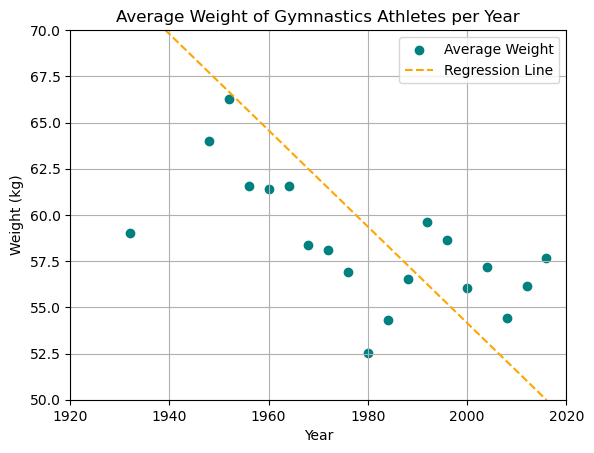

In [85]:
df_filtered = df[(df['Weight'].notna()) & (df['Sport'] == 'Gymnastics')]

average_weight_gymnastics_per_year = df_filtered.groupby('Year')['Weight'].mean().reset_index()

X = average_weight_gymnastics_per_year['Year'].values.reshape(-1, 1)
y = average_weight_gymnastics_per_year['Weight'].values.reshape(-1, 1)

regression = LinearRegression()
regression.fit(X, y)

y_pred = regression.predict(X)

fig, ax = plt.subplots()
marker_size = 12

plt.scatter(average_weight_gymnastics_per_year['Year'], average_weight_gymnastics_per_year['Weight'], color="teal", label="Average Weight")
plt.plot(X, y_pred, color='orange', linestyle='--', label='Regression Line')

plt.title('Average Weight of Gymnastics Athletes per Year')
plt.xlabel('Year')
plt.ylabel('Weight (kg)')
plt.ylim(50, 70)  
plt.xlim(1920, 2020)
plt.legend()
plt.grid(True)

plt.show()
